# Project of SD-TSIA210

## Step 1 - Clustering, Dimension Reduction, Interpretation

### 1. Preprocessing

In [1]:
import pandas as pd
import pathlib
import itertools
import string
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from stop_words import get_stop_words
import matplotlib.pyplot as plt

def read_data(filename: str):

    df = pd.read_csv(filename)
    return df


def get_responses(df: pd.DataFrame):
    """ Extract responses and return a pd.DataFrame
    with columns: authorId, questionId, formattedValue

    Args:
        df: dataframe from read_data

    Returns:
        pd.DataFrame with responses
    """
    responses = []
    for i, x in df.iterrows():
        df_tmp = (pd.DataFrame(x.responses).
                  filter(['questionId', 'formattedValue']).
                  assign(authorId=x.authorId))
        responses.append(df_tmp)

    return pd.concat(responses, ignore_index=True)

def extract_responses_by_id(responses: list, key: str='138'):
    """ Extract a specific question

    Args:
        responses: list (example df.iloc[0].responses)
        key: questionId (example '142')

    Returns:
        responses as a string
    """

    response = [x['formattedValue'] for x in responses
                if x['questionId'] == key]
    if len(response):
        return response[0]
    else:
        return None

def find_most_common_words(df: pd.DataFrame, featurename: str):
    x = df[featurename]
    answers = x.formattedValue.values.tolist()
    answers = ' '.join(answers)
    answers = answers.lower()

    stop_words = set(stopwords.words('french') +
                     list(string.punctuation) +
                     get_stop_words('fr'))
    word_tokens = word_tokenize(answers, language='french')

    words = [x for x in word_tokens if x not in stop_words]

    cnt = Counter(words)
    cnt.most_common(20)



In [2]:
df = read_data("EVENTS.csv")

## Step 2 - Supervised Learning, Prediction

In [3]:
df

,id,title,createdAt,updatedAt,startAt,endAt,enabled,lat,lng,fullAddress,link,url,body,authorId,authorType,authorZipCode
0,RXZlbnQ6MTc1NjE2ZDYtMWE2My0xMWU5LTk0ZDItZmExNj...,Réunion à la participation citoyenne pour le G...,2019-01-17 15:20:50,2019-02-25 17:07:49,2019-03-02 18:30:00,2019-03-02 23:00:00,True,43.620069,1.470152,"Maison de la Citoyenneté de Toulouse Est, Quar...",NaN,https://granddebat.fr/events/reunion-a-la-part...,<p><em>L’exactitude des informations ci-dessou...,VXNlcjo1MjY0ZDRhMi0xOTkxLTExZTktOTRkMi1mYTE2M2...,Élu / élue et Institution,31500
1,RXZlbnQ6MTc1NzUzMjUtMmJhMi0xMWU5LWJmNTYtZmExNj...,Grand débat des entreprises,2019-02-08 14:04:38,2019-02-08 14:04:38,2019-03-04 18:30:00,2019-03-04 22:00:00,True,44.988127,4.976960,"1, rue Marc Seguin, 26300 ALIXAN",NaN,https://granddebat.fr/events/grand-debat-des-e...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjpiYjc3NDFkOC0yYWRiLTExZTktOTRkMi1mYTE2M2...,Élu / élue et Institution,26000
2,RXZlbnQ6MTc1OTk3MzYtMmY3ZC0xMWU5LWJmNTYtZmExNj...,Club du 3ème âge,2019-02-13 11:49:52,2019-02-13 11:49:51,2019-02-22 14:00:00,2019-02-22 17:30:00,True,49.211872,-0.378057,"Maison de Quartier, Place Dom Aubourg, 14000 CAEN",NaN,https://granddebat.fr/events/club-du-3eme-age,“<i>L’exactitude des informations ci-dessous r...,VXNlcjo2Y2NhNzhhOC0yZWE1LTExZTktYmY1Ni1mYTE2M2...,Organisation à but non lucratif,14000
3,RXZlbnQ6MTc1Y2E2YmMtMzQzOC0xMWU5LWJmNTYtZmExNj...,Grand débat national GAGNY,2019-02-19 12:18:32,2019-02-19 12:18:32,2019-02-25 19:00:00,2019-02-25 21:00:00,True,48.894931,2.538318,"Club Paul Éluard, 18 bis allée des Chênes, 932...",NaN,https://granddebat.fr/events/grand-debat-natio...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjo4NmI2NzQ4OS0xYmNjLTExZTktOTRkMi1mYTE2M2...,Organisation à but non lucratif,93220
4,RXZlbnQ6MTc2NTVjZjYtMmJhMi0xMWU5LWJmNTYtZmExNj...,débat sur l'organisation de l'Etat et des serv...,2019-02-08 14:04:38,2019-02-08 14:04:38,2019-03-05 20:00:00,2019-03-05 22:00:00,True,47.122187,6.197913,"à la mairie de Saules, 25580 Saules",NaN,https://granddebat.fr/events/debat-sur-lorgani...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjo0Y2I5MDc2ZS0yYWU1LTExZTktOTRkMi1mYTE2M2...,Élu / élue et Institution,25580
5,RXZlbnQ6MTc2OGFjOTEtMmY3ZC0xMWU5LWJmNTYtZmExNj...,Le grand débat national - Réunion publique,2019-02-13 11:49:52,2019-02-13 11:49:52,2019-03-08 20:00:00,2019-03-08 23:00:00,True,45.813626,4.715132,"Maison de La Tour, 10 rue de l'Eglise, 69890 L...",NaN,https://granddebat.fr/events/le-grand-debat-na...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjphNGM5Zjk3Zi0yYWRmLTExZTktOTRkMi1mYTE2M2...,Élu / élue et Institution,69890
6,RXZlbnQ6MTc2YTJjYzYtMzQzOC0xMWU5LWJmNTYtZmExNj...,Mairie de Cormelles le Royal - Grand Débat - O...,2019-02-19 12:18:32,2019-02-19 12:18:32,2019-03-08 18:00:00,2019-03-08 22:00:00,True,49.152846,-0.330305,"Salle Polyvalente de l'Orée du Bois, 21bis rue...",NaN,https://granddebat.fr/events/mairie-de-cormell...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjowZjA0ZjYwNi0zMzg4LTExZTktYmY1Ni1mYTE2M2...,NaN,14123
7,RXZlbnQ6MTc3MTdiNmUtMjkyNi0xMWU5LTk0ZDItZmExNj...,l'état et les services publics,2019-02-05 10:11:59,2019-02-05 10:11:58,2019-03-01 19:00:00,2019-03-01 22:00:00,True,49.936817,2.925538,"Salle Patrick Dupond, 80200 Peronne",http://facebook,https://granddebat.fr/events/letat-et-les-serv...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjo5MmM4NzA0Yi0yNWYxLTExZTktOTRkMi1mYTE2M2...,Organisation à but non lucratif,2100
8,RXZlbnQ6MTc3NjY1N2UtMmY3ZC0xMWU5LWJmNTYtZmExNj...,Grand débat national spécial entreprises,2019-02-13 11:49:52,2019-02-13 11:49:52,2019-02-13 18:00:00,2019-02-13 20:00:00,True,49.921622,1.076614,"CCI Rouen Métropole, Délégation de Dieppe, 2 r...",NaN,https://granddebat.fr/events/grand-debat-natio...,“<i>L’exactitude des informations ci-dessous r...,VXNlcjoyOWFjNDBmOC0yOTU3LTExZTktOTRkMi1mYTE2M2...,Élu / élue et Institution,76000
9,RXZlbnQ6MTc3Njk5MzctMmJhMi0xMWU5LWJ

In [4]:
del df['id']  
del df['link'] # around 500 samples over around 10000 have a link 
del df['url'] # it is just a link to the national debate website
del df['enabled'] # because all values are true

In [5]:
df = df [ (df["authorZipCode"] < 100000) & ( df["authorZipCode"] > 1000)]

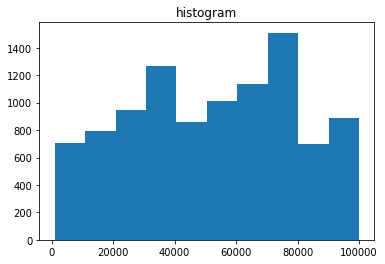

In [6]:
plt.hist(df["authorZipCode"])
plt.title("histogram") 
plt.show()

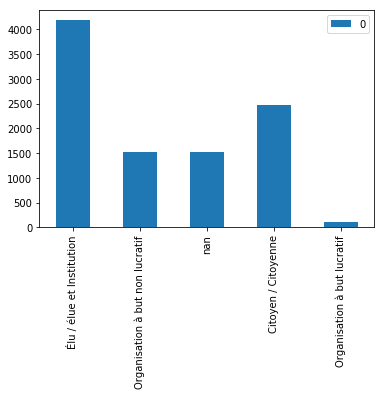

In [7]:
import pandas
from collections import Counter
letter_counts = Counter(df["authorType"])
dataFr = pandas.DataFrame.from_dict(letter_counts, orient='index')
dataFr.plot(kind='bar')
plt.show()